# Capstone Project 1: 

## 1) Data Wrangling

In this project, we study customer behaviours of a store in black friday. the data file is provided in kaggle website in csv format: 
https://www.kaggle.com/mehdidag/black-friday

data file includes customer information of around 550,000 observations.the variables are: User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3 and Purchase. 

Data Cleaning: we added few additional columns: Gender Category (binary values), and Age Category (Integer Values), in "Stay_In_Current_City_Years", we changed "+4" to 4 to be a categorical variable. we droped User_ID and Product_ID, since it probably won't help us. we change the type of Product_Category_2 and Product_Category_3 to int64 as well. 

Missing Values: we have missing values in "Product_Category_2" and "Product_Category_3" columns. it just means that specific customer haven't bought from that category, so we replace it with zero, which is helpful in modeling stage. 

Outliers: by using different type of visualizations, we showed that there is no outlier in dataset.

In [1]:
# Check the right path to call the data file
pwd

'C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1'

In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')

## 1.a. Data Cleaning

In [3]:
# We check the column names, they all look ok and descriptive. also, I check to make sure there is no extra space in the names.
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
# We can find the missing values by using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
# To check the total number of counts in each columns. as stated above, some values are null only in Product_Category_2 and Product_Category_3
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## 1.b. Missing Values and Continuation of Data Cleaning
We have already found the count of missing values in each column. "Product_Category_2" and "Product_Category_3" columns have missing values. it's very normal. that means some customers haven't bought products 2 and 3. for modeling part, we can fill these Null values by zero.

In [6]:
# Now we fill Null values with zero
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)

In [7]:
# "Stay_In_Current_City_Years" column can change to an integer type. but first, we should take care of "+4" values
df.Stay_In_Current_City_Years.replace("4+",4,inplace=True)

In [8]:
# Drop User_ID and Product_ID columns, since they won't help us in our analysis
#df = df.drop(columns=['User_ID','Product_ID'])

In [10]:
# change the columns to categorical or integer types. this way, data takes less memory as well.
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('int64')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [11]:
# Now, we add two additional columns. we categorize Gender and Age with numeric values
# Gender
def Gendr_Categry(x):
    if x.Gender == 'F':
        return 1
    else:
        return 0

df['Gender_Category'] = df.apply(Gendr_Categry, axis = 1)
# Age
def Ag_Cat(x):
    if x.Age == '0-17':
        return 0
    if x.Age == '18-25':
        return 1
    if x.Age == '26-35':
        return 2
    if x.Age == '36-45':
        return 3
    if x.Age == '46-50':
        return 4
    if x.Age == '51-55':
        return 5
    else:
        return 6
df['Age_Category'] = df.apply(Ag_Cat, axis = 1)


In [12]:
# By applying info method, we see how clean data looks so far.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 14 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null int64
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
Gender_Category               537577 non-null int64
Age_Category                  537577 non-null int64
dtypes: category(4), int64(9), object(1)
memory usage: 43.1+ MB


## 1.c. Outliers Checking
All these figures and numbers show that there is no outlier value in any of those columns. they all look to be in a specific range. all customers spend money in a specific range and bought the products very similar to each other.

In [13]:
# import the file one more time with a new dataframe name to check the outliers (without replacing missing values)
df2 = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')

In [14]:
# a quick check of .describe() method, doesn't show any outliers. below figures don't show outliers either.
df2[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].describe()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000000,370591.000000,164278.000000,537577.000000
mean,5.295546,9.842144,12.669840,9333.859853
std,3.750701,5.087259,4.124341,4981.022133
min,1.000000,2.000000,3.000000,185.000000
25%,1.000000,5.000000,9.000000,5866.000000
50%,5.000000,9.000000,14.000000,8062.000000
75%,8.000000,15.000000,16.000000,12073.000000
max,18.000000,18.000000,18.000000,23961.000000


# 2. Data Visualization
In this part, we study the characteristics of customers. these are included Age, Marital_Status,Gender, Number of Years Living in That City, and the type of city that they are living. that helps to know what type of customers are more excited about black friday and its offers. it will help to focus to advertise in that particular audience.

## 2.a. Age and Gender
This figure shows that male customers have more interest to buy from this store. and specificuly, most customers are in age group 26-35.other information is represented in chart below.

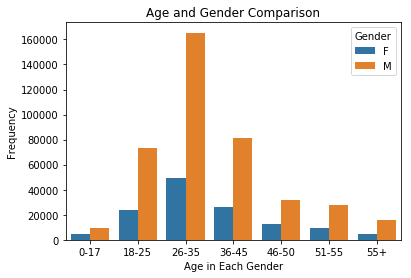

In [15]:
sns.countplot(x='Age',hue='Gender', data=df)
plt.title('Age and Gender Comparison')
plt.xlabel('Age in Each Gender')
plt.ylabel('Frequency')
plt.show()

## 2.b. Age and Marital Status
Highest number of cusromers are single and between 26-35 in black friday. looks like this store has more popularity in single males and age group of 26-35. 

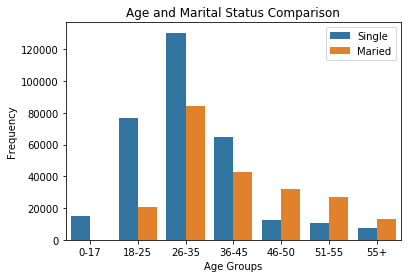

In [16]:
sns.countplot(x='Age',hue='Marital_Status', data=df)
# instead of 0 and 1, we call "Single" and "Maried"
L=plt.legend()
L.get_texts()[0].set_text('Single')
L.get_texts()[1].set_text('Maried')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Age and Marital Status Comparison')
plt.show()

## 2.c. Age and Number of Years Living in the City
Now, let's dig in the type of people who live there. this store has most popularity among those who moved to this city in 1 year. the other type of information has been represented in chart below.

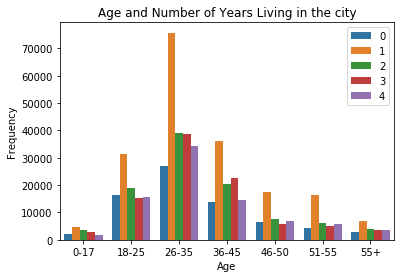

In [17]:
ax = sns.countplot(x='Age',hue='Stay_In_Current_City_Years', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and Number of Years Living in the city')
# sort both labels and handles by labels
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)
plt.show()

## 2.d. Age and City Category
As you see below, main customers live in suburban areas of city, second rank is urban areas, and the last group lives in rural areas.

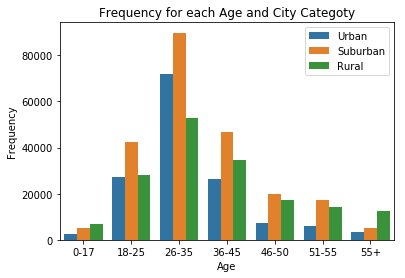

In [18]:
sns.countplot(x='Age',hue='City_Category', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency for each Age and City Categoty')
# Change the labels in legend
L=plt.legend()
L.get_texts()[0].set_text('Urban')
L.get_texts()[1].set_text('Suburban')
L.get_texts()[2].set_text('Rural')
plt.show()

## 2.e. Fractions of Each Factor
In pie charts below, you will see the percentage of each category for each one of these factors.

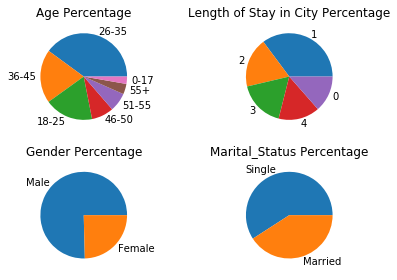

In [19]:
plt.subplot(2,2,1)
x = df['Age'].value_counts()
plt.pie(x,labels=x.index) # ['26-35','36-45','18-25','46-50','51-55','55+','0-17']
plt.title('Age Percentage')
plt.subplot(2,2,2)
y = df['Stay_In_Current_City_Years'].value_counts()
plt.pie(y,labels = y.index) # ['1 year', '2 years','3 years','more than 4 years', 'not living in the city']
plt.title('Length of Stay in City Percentage')
plt.subplot(2,2,3)
y = df['Gender'].value_counts()
plt.pie(y,labels = ['Male','Female'])
plt.title('Gender Percentage')
plt.subplot(2,2,4)
y = df['Marital_Status'].value_counts()
plt.pie(y,labels = ['Single','Married'])
plt.title('Marital_Status Percentage')
plt.tight_layout()
plt.show()

## 2.f. Gender-Marital Status Combination in Each Category of Product
Now, we study combination of Age and Gender in each product category. Single male customers have the highest interest to buy in black friday. this conclusion is correct in all three product categories.

In [20]:
def Gen_Mar(x):
    if x.Gender == 'M' and x.Marital_Status == 0:
        return 'Single Male'
    elif x.Gender == 'F' and x.Marital_Status == 0:
        return 'Single Female'
    elif x.Gender == 'M' and x.Marital_Status == 1:
        return 'Married Male'
    elif x.Gender == 'F' and x.Marital_Status == 1:
        return 'Married Female'
df['Gender_MaritalStatus'] = df.apply(Gen_Mar,axis=1)

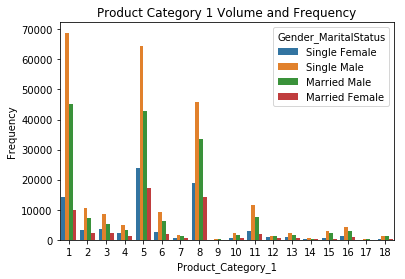

In [21]:
sns.countplot(df['Product_Category_1'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 1 Volume and Frequency')
plt.show()

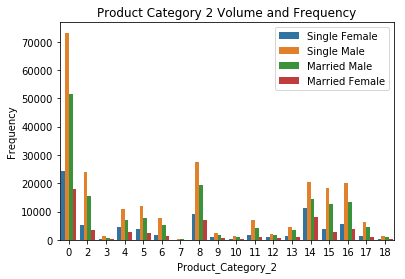

In [22]:
sns.countplot(df['Product_Category_2'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 2 Volume and Frequency')
plt.legend(loc='upper right')
plt.show()

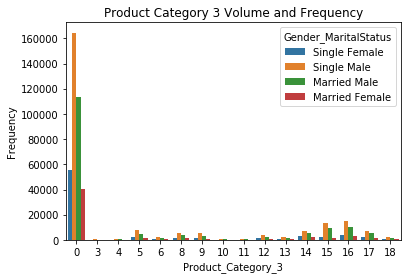

In [23]:
sns.countplot(df['Product_Category_3'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 3 Volume and Frequency')
plt.show()

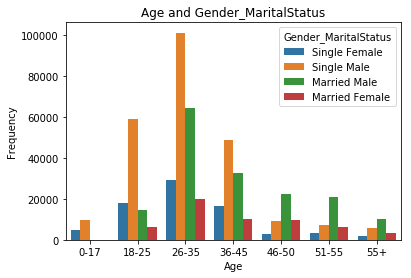

In [24]:
sns.countplot(df['Age'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Age and Gender_MaritalStatus')
plt.show()

## 2.g. Purchase and Product Categories Comparison
Box plots show the distribution of values in each one the columns. this is another way to check the outliers. having no outliers shows that all customers are in a specific range of wealth. so advertising equally among customers is very important.
The next chart shows the total purchase dollars among different age groups. again, this chart shows that people in age group 26-35 spent more money.
last 4 charts show the histograms of each product category and purchase.

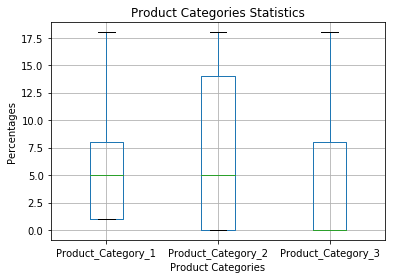

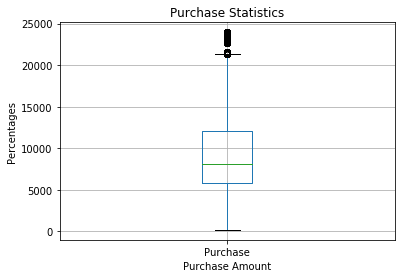

In [25]:
df.boxplot(column = ['Product_Category_1','Product_Category_2','Product_Category_3'])
plt.xlabel('Product Categories')
plt.ylabel('Percentages')
plt.ylabel('Percentages')
plt.title('Product Categories Statistics')
plt.show()
df.boxplot(column = ['Purchase'])
plt.xlabel('Purchase Amount')
plt.ylabel('Percentages')
plt.title('Purchase Statistics')
plt.show()          

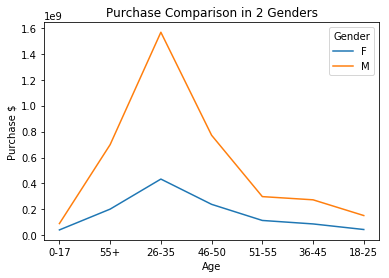

In [26]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
df = df.groupby(['Age','Gender']).Purchase.sum()
df = df.unstack('Gender')
ax = df.plot(title = 'Purchase Comparison in 2 Genders')
group_labels = ['','0-17', '55+', '26-35','46-50', '51-55', '36-45','18-25']
ax.set_xticklabels(group_labels)
plt.ylabel('Purchase $')
plt.show()

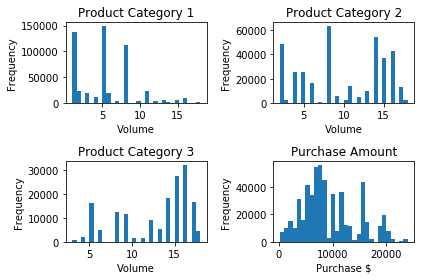

In [28]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
plt.subplot(2,2,1)
plt.hist(df['Product_Category_1'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 1')
plt.subplot(2,2,2)
plt.hist(df['Product_Category_2'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 2')
plt.subplot(2,2,3)
plt.hist(df['Product_Category_3'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 3')
plt.subplot(2,2,4)
plt.hist(df['Purchase'],bins = 30)
plt.xlabel('Purchase $')
plt.ylabel('Frequency')
plt.title('Purchase Amount')
plt.tight_layout()
plt.show()

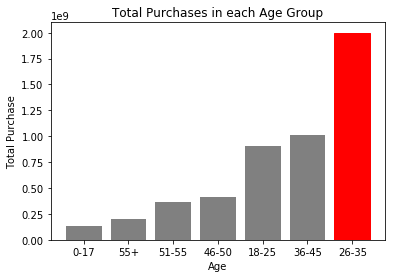

In [29]:
age_purchases = df.groupby('Age')['Purchase'].sum().sort_values()
barlist = plt.bar(age_purchases.index,age_purchases, data=df,color='grey')
plt.xlabel('Age')
plt.ylabel('Total Purchase')
plt.title('Total Purchases in each Age Group')
barlist[6].set_color('r')
# for a,b in zip(x, y):
   # plt.text(a, b, str(b))
plt.show()

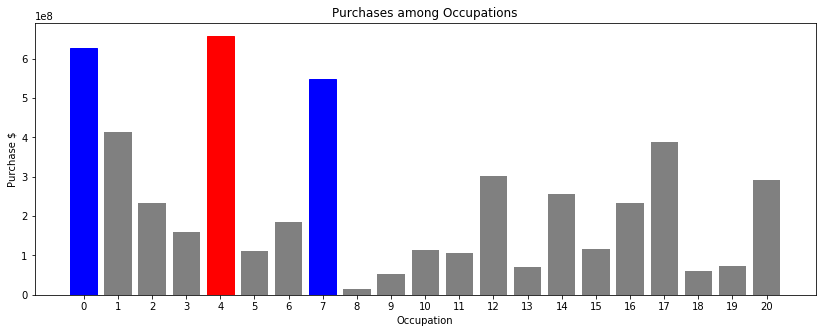

In [30]:
occupation_purchases = df.groupby('Occupation')['Purchase'].sum()
fig,ax = plt.subplots(figsize=(14,5))
barlist = ax.bar(occupation_purchases.index,occupation_purchases,data = df, color='grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(len(occupation_purchases)))
ax.set_xticklabels(occupation_purchases.index)
# highligh the talest bars
barlist[4].set_color('r')
barlist[0].set_color('b')
barlist[7].set_color('b')
plt.xlabel('Occupation')
plt.ylabel('Purchase $')
plt.title('Purchases among Occupations')
plt.show()

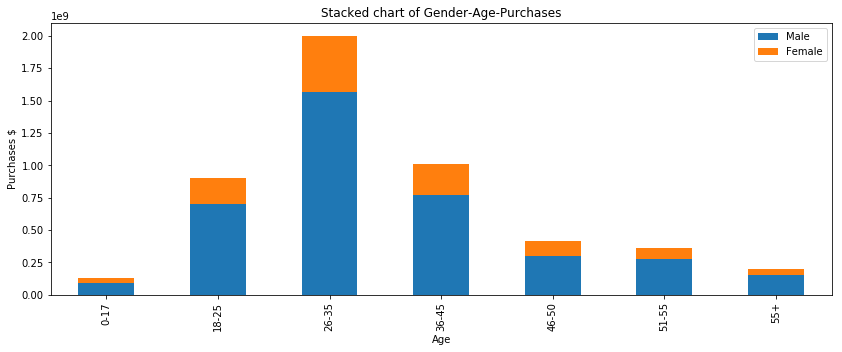

In [31]:
male_purchases_by_age = list(df[['Age','Gender','Purchase']].loc[df.Gender == 'M'].groupby(['Age', 'Gender']).Purchase.sum())
female_purchases_by_age = list(df[['Age','Gender','Purchase']].loc[df.Gender == 'F'].groupby(['Age', 'Gender']).Purchase.sum())
df_structured = pd.DataFrame(index= ['0-17','18-25','26-35','36-45','46-50','51-55','55+'], data={'Male':male_purchases_by_age,
                                                                                   'Female':female_purchases_by_age})

df_structured.plot(kind="bar", stacked=True, figsize=(14,5))
plt.xlabel('Age')
plt.ylabel('Purchases $')
plt.title('Stacked chart of Gender-Age-Purchases')
plt.show()

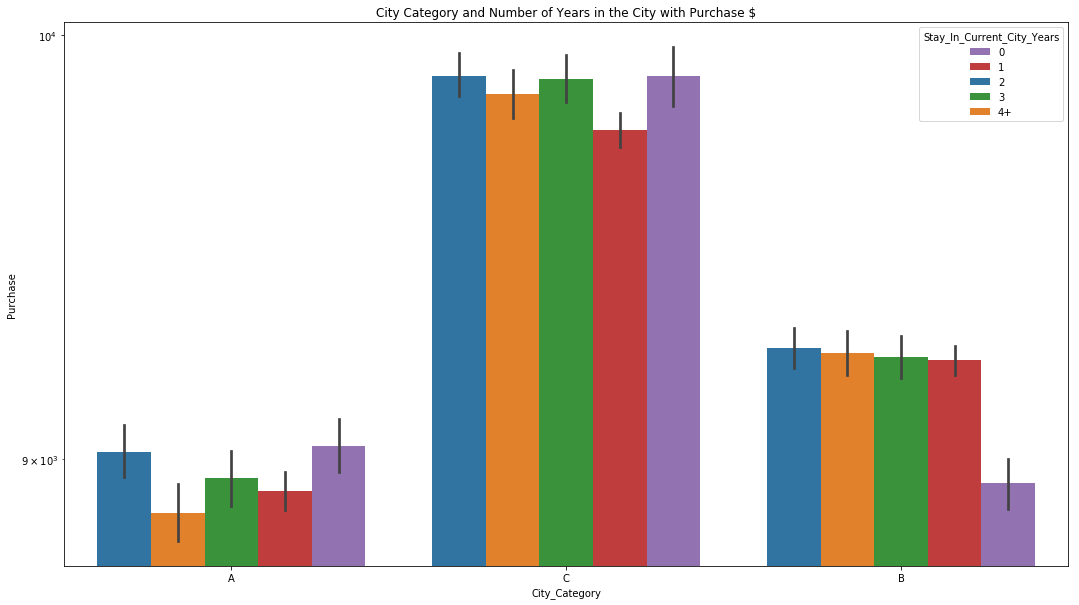

In [33]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='City_Category', y='Purchase',hue = 'Stay_In_Current_City_Years', data=df)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, title = 'Stay_In_Current_City_Years')
plt.yscale('log')
plt.title('City Category and Number of Years in the City with Purchase $')
plt.show()

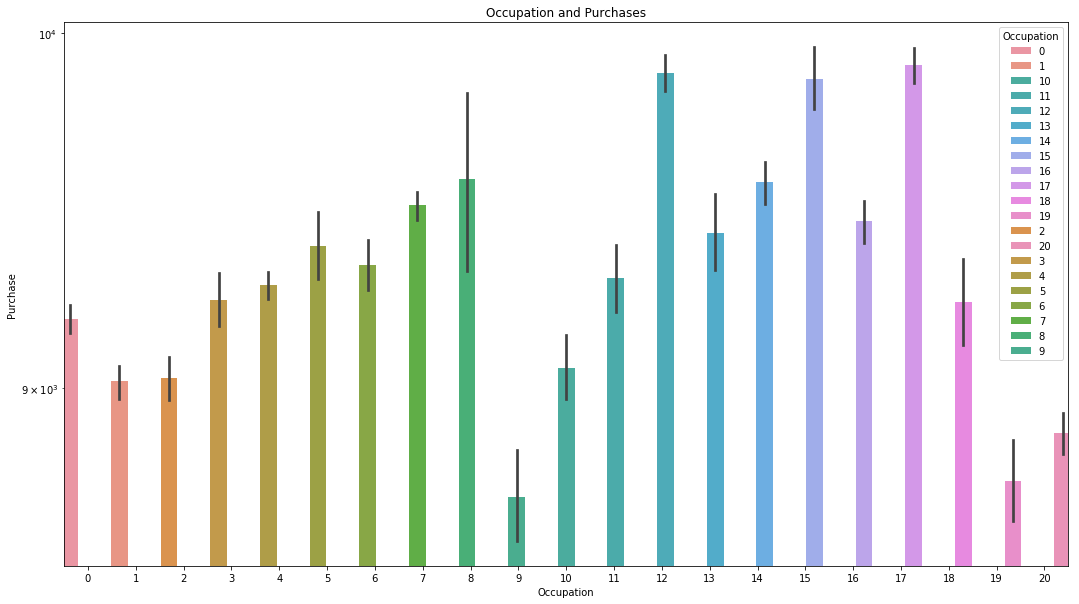

In [35]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='Occupation', ax = ax, y='Purchase',hue = 'Occupation', data=df)
# to change the width of the bars bigger
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, title = 'Occupation', loc= 'upper right')
plt.yscale('log')
plt.title('Occupation and Purchases')
plt.show()

Text(0.5, 1.0, 'Product Category 1 vs. Purchase $')

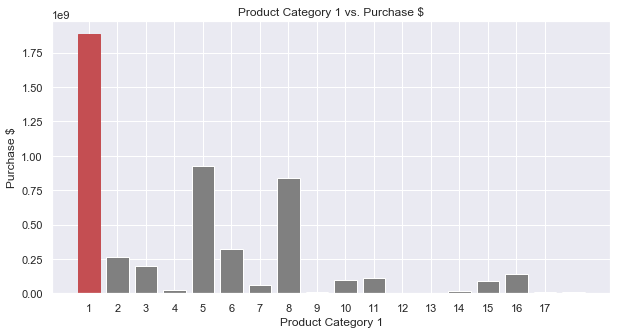

In [36]:
Cat1_Purchases = df.groupby('Product_Category_1').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat1_Purchases.index,Cat1_Purchases, color = 'grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(1,len(Cat1_Purchases)))
ax.set_xticklabels(Cat1_Purchases.index)
# we highlight the highest value
barlist[0].set_color('r')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase $')
plt.title('Product Category 1 vs. Purchase $')

Text(0.5, 1.0, 'Product Category 2 vs. Purchase $')

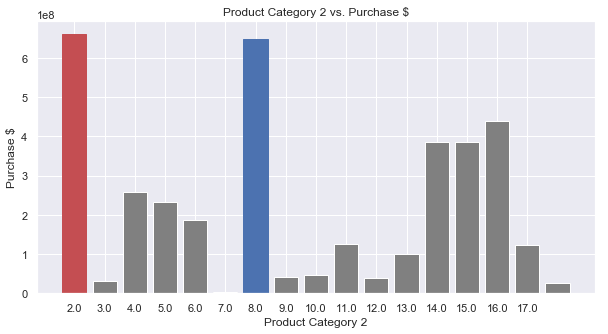

In [37]:
Cat2_Purchases = df.groupby('Product_Category_2').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat2_Purchases.index,Cat2_Purchases, color = 'grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(2,len(Cat2_Purchases)+1))
ax.set_xticklabels(Cat2_Purchases.index)
# we highlight the highest value
barlist[0].set_color('r')
barlist[6].set_color('b')
plt.xlabel('Product Category 2')
plt.ylabel('Purchase $')
plt.title('Product Category 2 vs. Purchase $')

Text(0.5, 1.0, 'Product Category 3 vs. Purchase $')

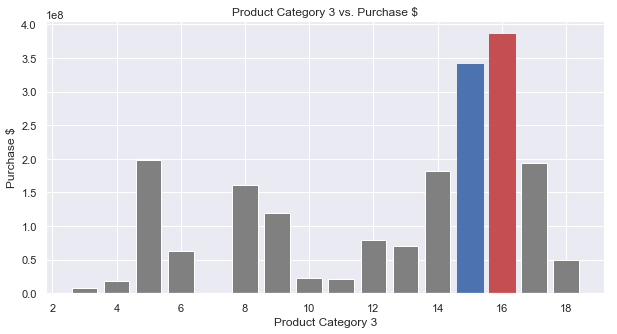

In [38]:
Cat3_Purchases = df.groupby('Product_Category_3').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat3_Purchases.index,Cat3_Purchases, color = 'grey')
# we highlight the highest value
barlist[12].set_color('r')
barlist[11].set_color('b')
plt.xlabel('Product Category 3')
plt.ylabel('Purchase $')
plt.title('Product Category 3 vs. Purchase $')

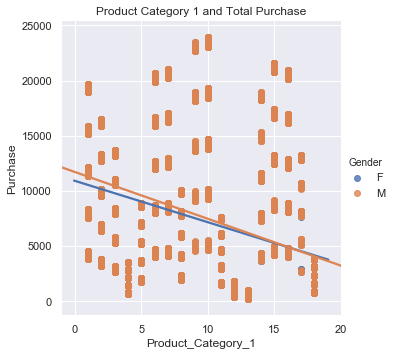

In [39]:
sns.lmplot(x='Product_Category_1', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 1 and Total Purchase')
plt.show()

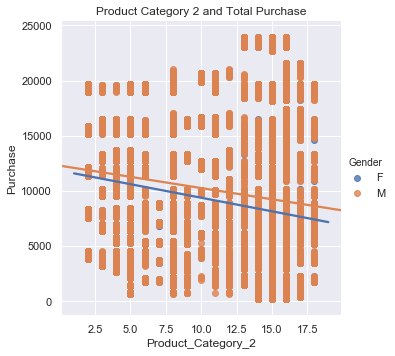

In [40]:
sns.lmplot(x='Product_Category_2', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 2 and Total Purchase')
plt.show()

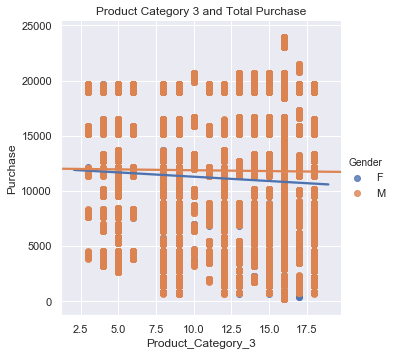

In [41]:
sns.lmplot(x='Product_Category_3', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 3 and Total Purchase')
plt.show()